In [48]:
import cosmology as cos
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
import seaborn as sea
%matplotlib inline

In [49]:
# set plotting parameters
plt.rc('text', usetex=True)
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})

## Part 4 (a)

In [50]:
# given cosmological parameters
z = 4.25
h = 0.70
omega_matter = 0.27
omega_lambda = 0.73
H0 = 100*h

In [51]:
model = FlatLambdaCDM(H0, omega_matter) 

def vel_now(redshift):
    return model.H0 * model.comoving_distance(redshift)

In [52]:
cos.recession_velocity(z)

<Quantity 2.78800426e+08 m / s>

In [53]:
vel_now(z)

<Quantity 531097.96263321 km / s>

In [54]:
redshifts = np.linspace(0.0000001, 11.09, num=1000) # can't start at 0, because it'll result in infinity
ratio = vel_now(redshifts)/(cos.recession_velocity(redshifts)*10**(-3))

##### Let's take a look at the discrepancy between my value and the astropy value as a function of redshift. 

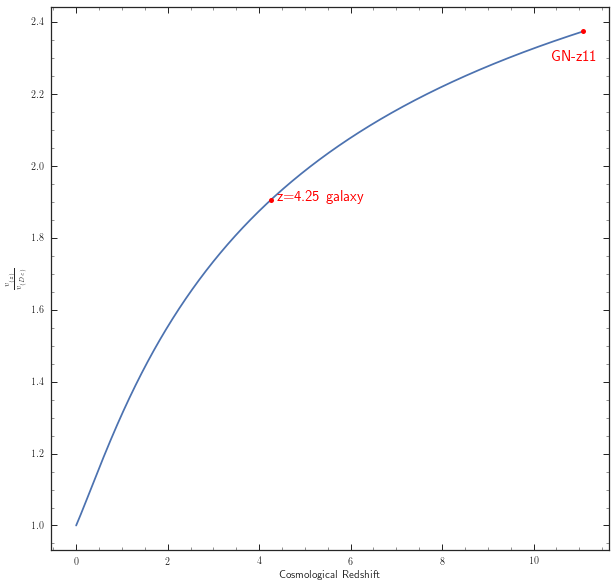

In [55]:
plt.figure(figsize = (10,10))
plt.plot(redshifts, ratio)
gnz11 = np.where(redshifts == 11.09)
ratio_gal = vel_now(z)/(cos.recession_velocity(z)*10**(-3))
plt.plot(redshifts[gnz11], ratio[gnz11], 'o', c='red', ms=5)
plt.text(redshifts[gnz11]-0.7, ratio[gnz11].value-0.08, 'GN-z11', color='red', fontsize = 15)
plt.plot(z, ratio_gal, 'o', c='red', ms=5)
plt.text(z+0.15, ratio_gal.value, 'z=4.25 galaxy', color='red', fontsize = 15)
plt.rc('axes', labelsize=20) 
plt.xlabel('Cosmological Redshift')
plt.ylabel(r"$\frac{v_{_{(z)}}}{v_{_{(Dc)}}}$")
plt.savefig('velocity_methods.png')

## Part 4 (b)

In [56]:
term1 = (2/3)*(omega_lambda)**(-1/2)
term2 = np.log((1+np.sqrt(omega_lambda))/np.sqrt(omega_matter))
corr_fac = term1*term2
t0 = (1/h)*9.78*corr_fac

In [57]:
astropy_tl = model.lookback_time(z)
astropy_age = t0 - astropy_tl.value

In [58]:
redshifts = np.linspace(0, 4.25, num=100)
my_tl = cos.t_lookback(H0, omega_matter, omega_lambda, z)
my_age = t0 - my_tl

In [59]:
print('Astropy age (in Gyr):', astropy_age)
print('Age from Gaussian quad (in Gyr):', my_age)

Astropy age (in Gyr): 1.488174748352579
Age from Gaussian quad (in Gyr): [ 0.76713638 13.86925375]


It appears there's something wrong with my code, because the uncertainty is large, and increasing the number of sampling points has no effect on the result. Don't have time to fix it, so I'll use the result from Mathematica, which does something similar to Gaussian quadrature.  

In [60]:
integral = 0.88636

In [61]:
my_tl = (100/H0)*9.78*integral

In [62]:
print('Age from Mathematica (in Gyr):', t0-my_tl)

Age from Mathematica (in Gyr): 1.4855383270249014


## Part 4 (c)

In [63]:
from scipy.integrate import quad
func = lambda z: (1+z) / model.H(z).value**3
# find the constant of proportionality 
const = 1/quad(func, 0, np.inf)[0]
integral = quad(func, z, np.inf)[0]
print('D:', model.H(z)/model.H0 * const * integral)

D: 0.24977927467836344


In [64]:
# repeat for Einstein-de-Sitter 
omega_m = 1
omega_l = 0
h = 0.5
H0 = 100*h
model1 = FlatLambdaCDM(H0, omega_m)

In [65]:
func = lambda z: (1+z) / model1.H(z).value**3
# find the constant of proportionality 
const = 1/quad(func, 0, np.inf)[0]
integral = quad(func, z, np.inf)[0]
print('D:', model1.H(z)/model1.H0 * const * integral)

D: 0.19047576679988082


## Part 4 (d)

In [66]:
print("Comoving distance:", model.comoving_distance(z))

Comoving distance: 7587.113751902942 Mpc


## Part 4 (e)

In [67]:
print("Light travel distance:", model.lookback_distance(z))

Light travel distance: 3796.056080219697 Mpc


## Part 4 (f)

In [68]:
print("Luminosity distance:", model.luminosity_distance(z))

Luminosity distance: 39832.347197490446 Mpc


## Part 4 (g)

In [76]:
da = model.angular_diameter_distance(z)
print("Angular diameter distance:", da)
rad_to_arcsec = 206265
actual_size = da.value*(10**3/rad_to_arcsec)
print("Physical size (in kpc):", actual_size)

Angular diameter distance: 1445.164524171989 Mpc
Physical size (in kpc): 7.0063487463796035


## Part 4 (h)

In [81]:
da = model.angular_diameter_distance(1.5)
print("Angular diameter distance:", da)
print("Angular size at z = 1.5 (in arcseconds):", actual_size*rad_to_arcsec/(da.value*10**(3)))

Angular diameter distance: 1786.7937786626903 Mpc
Angular size at z = 1.5 (in arcseconds): 0.8088031990203196
